In [15]:
import math
import numpy as np
from matplotlib import pyplot as plt

We need to find maximum of this $g(x)$
\begin{equation}
e^{x^2 + 1} - 2.718 + 0.16969 x - 4.07799 x^2 + 3.3653 x^3 - 4.1279 x^4
\end{equation}

To find maximum of $g(x)$, we need to find roots of $g^{\prime}(x)$, so a function `gprime` 

To find roots and confirm if it's a maxima, we need `gdoubleprime(x)`, as $g(x)$ is at maximum if $g^{\prime\prime}(x)$ is negative

In [16]:
def g(x):
    return np.exp(x**2 + 1) - 2.718 + 0.16969*x - 4.07799*x**2 + 3.3653 * x**3 - 4.1279 * x**4

def gprime(x):
    return np.exp(x**2 + 1) * 2 * x + 0.16969 - 2.0 * 4.07799 * x + 3 * 3.3653 * x**2 - 4 * 4.1279 * x**3

def gdoubleprime(x):
    return 2 * (2 * x + 1) * np.exp(x**2 + 1) - 2.0 * 4.07799 + 3 * 2 * 3.3653 * x - 4 * 3 * 4.1279 * x**2

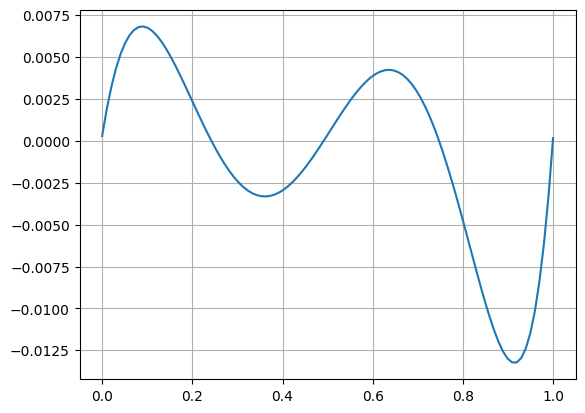

In [17]:
x = np.linspace(0, 1, 100)
plt.plot(x, g(x))
plt.grid(True)

Newton method

In [18]:
def nm_step(x, step_num):
    val = x - gprime(x) / gdoubleprime(x)
    step_num += 1
    print(f"Step Num: {step_num}, x: {val}")
    return val, step_num

Secant method

In [19]:
def secant_step(x1, x2, step_num, f):
    step_num += 1
    val = x2 - f(x2)*(x2 - x1) / (f(x2) - f(x1))
    print(f"Step Num: {step_num}, x: {val}")
    return x2, val, step_num

Execution: We use secant method here because we can bound it. 

In [20]:
def calculate_first_max():
    step_num = 0
    x1 = 0      # These bounds are found by analyzing the graph
    x2 = 0.2
    for i in range(19):
        x1, x2, step_num = secant_step(x1, x2, step_num, gprime)
    return x2

def calculate_second_max():
    step_num = 0
    x1 = 0.6      # These bounds are found by analyzing the graph
    x2 = 0.7
    for i in range(6):
        x1, x2, step_num = secant_step(x1, x2, step_num, gprime)
    return x2

In [21]:
    print("Calculating x for first maximum in x -> [0, 1], in interval [0, 0.2]:")
    max_x_1 = calculate_first_max()
    print("First maximum value: ", g(max_x_1))

Calculating x for first maximum in x -> [0, 1], in interval [0, 0.2]:
Step Num: 1, x: 0.14900380590331655
Step Num: 2, x: -0.08821605866212776
Step Num: 3, x: 0.12814220849590097
Step Num: 4, x: 0.11341387156881519
Step Num: 5, x: 0.0806834268432286
Step Num: 6, x: 0.09017014204250429
Step Num: 7, x: 0.08892692738129448
Step Num: 8, x: 0.08886390723627205
Step Num: 9, x: 0.08886440328278541
Step Num: 10, x: 0.08886440309559314
Step Num: 11, x: 0.08886440309559253
Step Num: 12, x: 0.0888644030955926
Step Num: 13, x: 0.08886440309559303
Step Num: 14, x: 0.08886440309559265
Step Num: 15, x: 0.08886440309559258
Step Num: 16, x: 0.08886440309559261
Step Num: 17, x: 0.0888644030955926
Step Num: 18, x: 0.08886440309559261
Step Num: 19, x: 0.08886440309559261
First maximum value:  0.006812940563426053


In [22]:
    print("Calculating x for second maximum in x -> [0, 1], in interval [0.6, 0.7]:")
    max_x_2 = calculate_second_max()
    print("Second maximum value: ", g(max_x_2))

Calculating x for second maximum in x -> [0, 1], in interval [0.6, 0.7]:
Step Num: 1, x: 0.6307415305490232
Step Num: 2, x: 0.6353034667646523
Step Num: 3, x: 0.6358951723781623
Step Num: 4, x: 0.6358866382102938
Step Num: 5, x: 0.6358866518459403
Step Num: 6, x: 0.6358866518462564
Second maximum value:  0.004225969342977254


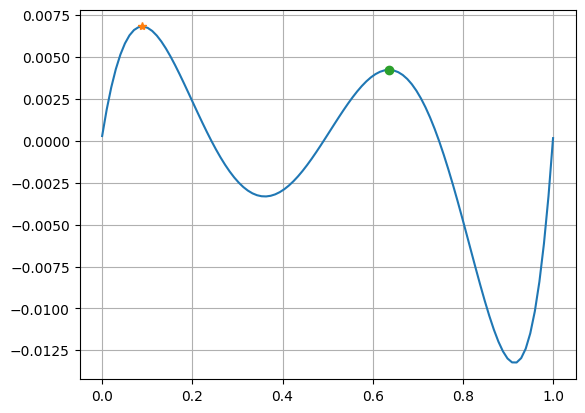

In [25]:
plt.plot(x, g(x))
plt.plot(max_x_1, g(max_x_1), '*')
plt.plot(max_x_2, g(max_x_2), 'o')
plt.grid(True)